Chapter 23

# 非正交坐标系
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这个代码通过矩阵变换来展示二维向量和网格的线性变换效果。首先，代码定义了一个二维网格，该网格的横纵坐标分别为$x_1$和$x_2$，表示为矩阵$X$，每一列是一个二维坐标点。然后，通过定义的变换矩阵 

$$
R = \begin{bmatrix} 1 & 3 \\ 2 & 1 \end{bmatrix}
$$ 

对原始网格$X$进行线性变换。变换的结果为 

$$
Z = X \cdot R^T
$$ 

即新的坐标点矩阵$Z$，其中每一个点在新坐标系下的坐标分别表示为$z_1$和$z_2$。

代码通过绘制原始网格以及变换后的网格，直观展示了变换如何作用于点的分布。此外，还绘制了三个向量在变换前和变换后的位置，包括向量$[1,2]$、$[3,1]$和$[10,10]$，以可视化展示线性变换对不同向量的效果。最终结果包括两个子图，一个展示原始坐标系中的网格和向量，另一个展示变换后的坐标系中的网格和向量，分别以$x_1, x_2$和$z_1, z_2$作为坐标。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 定义绘制向量的函数

In [2]:
def draw_vector(vector, RBG): 
    array = np.array([[0, 0, vector[0], vector[1]]])
    X, Y, U, V = zip(*array)
    plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color=RBG, zorder = 1000) # 绘制向量

## 定义变量和网格

In [3]:
x1 = np.arange(-25, 25 + 1, step=1) # 定义x1轴的范围
x2 = np.arange(-25, 25 + 1, step=1) # 定义x2轴的范围

XX1, XX2 = np.meshgrid(x1, x2) # 生成网格

X = np.column_stack((XX1.ravel(), XX2.ravel())) # 合并网格点的坐标

## 定义变换矩阵R

In [4]:
R = np.matrix('1,3;2,1') # 定义变换矩阵

In [5]:
Z = X @ R.T # 对X应用矩阵变换

In [6]:
ZZ1 = Z[:, 0].reshape((len(x1), len(x2))) # 变换后的z1坐标
ZZ2 = Z[:, 1].reshape((len(x1), len(x2))) # 变换后的z2坐标

## 原始坐标系下的网格和向量图

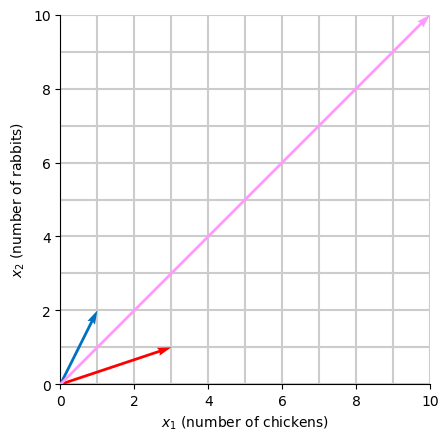

In [7]:
fig, ax = plt.subplots()

plt.plot(XX1, XX2, color=[0.8, 0.8, 0.8]) # 绘制网格线
plt.plot(XX1.T, XX2.T, color=[0.8, 0.8, 0.8]) # 绘制网格线的转置

draw_vector([1, 2], np.array([0, 112, 192]) / 255) # 绘制向量[1,2]
draw_vector([3, 1], np.array([255, 0, 0]) / 255) # 绘制向量[3,1]
draw_vector([10, 10], '#FF99FF') # 绘制向量[10,10]

plt.xlabel('$x_1$ (number of chickens)') # x轴标签
plt.ylabel('$x_2$ (number of rabbits)') # y轴标签

plt.axis('scaled') # 保持坐标轴比例
ax.set_xlim([0, 10]) # 设置x轴范围
ax.set_ylim([0, 10]) # 设置y轴范围

plt.xticks(np.arange(0, 10 + 1, step=2)) # 设置x轴刻度
plt.yticks(np.arange(0, 10 + 1, step=2)) # 设置y轴刻度

ax.spines['top'].set_visible(False) # 隐藏顶部边框
ax.spines['right'].set_visible(False) # 隐藏右边框

## 变换后坐标系下的网格和向量图

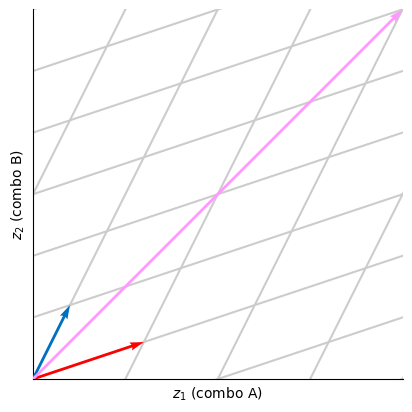

In [8]:
fig, ax = plt.subplots()

plt.plot(ZZ1, ZZ2, color=[0.8, 0.8, 0.8]) # 绘制变换后的网格线
plt.plot(ZZ1.T, ZZ2.T, color=[0.8, 0.8, 0.8]) # 绘制变换后的网格线的转置

draw_vector([1, 2], np.array([0, 112, 192]) / 255) # 绘制变换后的向量[1,2]
draw_vector([3, 1], np.array([255, 0, 0]) / 255) # 绘制变换后的向量[3,1]
draw_vector([10, 10], '#FF99FF') # 绘制变换后的向量[10,10]

plt.xlabel('$z_1$ (combo A)') # x轴标签
plt.ylabel('$z_2$ (combo B)') # y轴标签

plt.axis('scaled') # 保持坐标轴比例
ax.set_xlim([0, 10]) # 设置x轴范围
ax.set_ylim([0, 10]) # 设置y轴范围

plt.xticks(()) # 隐藏x轴刻度
plt.yticks(()) # 隐藏y轴刻度

ax.spines['top'].set_visible(False) # 隐藏顶部边框
ax.spines['right'].set_visible(False) # 隐藏右边框